In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools # for combinations
import statsmodels.api as sm # anova
from scipy import stats # significance levels, normality
from statsmodels.formula.api import ols


from statsmodels.stats.proportion import proportions_ztest
import statsmodels.formula.api as smf
import statsmodels
from statsmodels.stats import power
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import zt_ind_solve_power
%matplotlib inline

In [411]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [412]:
# There are 44188 rows and 21 columns
print(df.shape)

(41188, 21)


In [413]:
# examine the common stats of numeric columns
print(df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [414]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [415]:
# Examine data, there are some hidden columns
# show all columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [416]:
# loop through the data of each column, find the column has value of cell which is object =='?' then count
# There are 41188 rows and 21 columns
for col in df.columns:
    if df[col].dtype == object:
         print(col, df[col][df[col] == '?'].count())
df.shape

job 0
marital 0
education 0
default 0
housing 0
loan 0
contact 0
month 0
day_of_week 0
poutcome 0
y 0


(41188, 21)

In [417]:
# Because there are many of hidden columns & hidden rows, to see the overview of dataframe
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [418]:
# create new dataframe, narrow down the information about clients.
client_info = df.iloc[:,[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 14, 20]]
client_info.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,nonexistent,no
1,57,services,married,high.school,unknown,no,no,may,mon,149,nonexistent,no
2,37,services,married,high.school,no,yes,no,may,mon,226,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,nonexistent,no
4,56,services,married,high.school,no,no,yes,may,mon,307,nonexistent,no


In [419]:
#client_age = client_info.groupby(['age', 'y']).count()
client_info['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

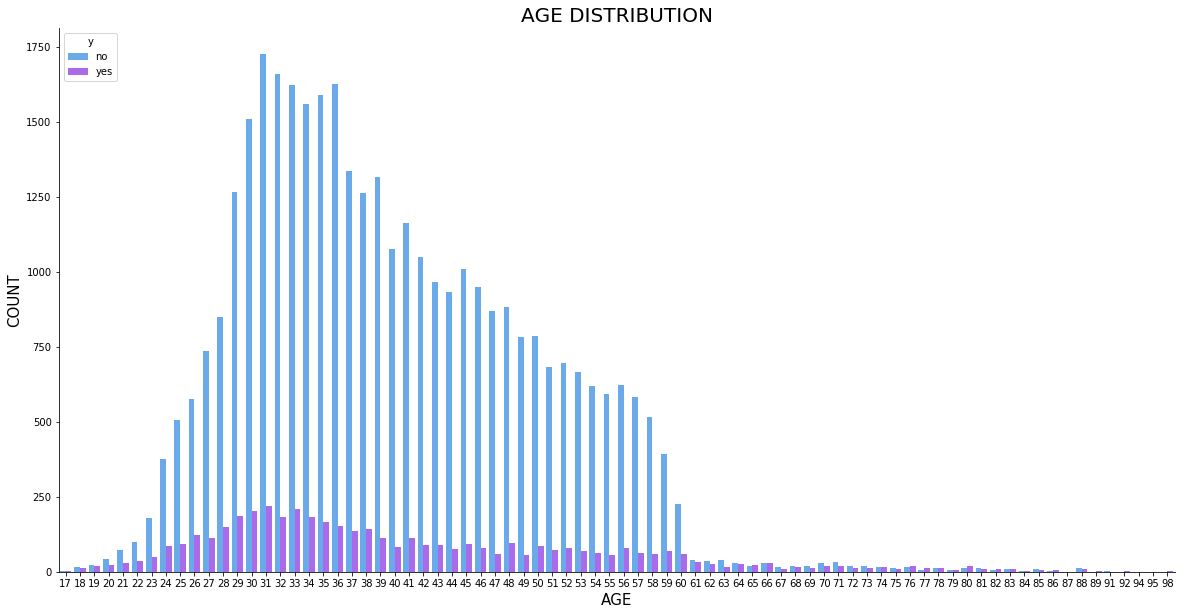

In [420]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x = 'age', hue='y', data = client_info, palette='cool')
ax.set_title('AGE DISTRIBUTION', fontsize=20)
ax.set_xlabel('AGE', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
sns.despine()

In [421]:
client_job = client_info.groupby(['job', 'y']).count().iloc[:, 0:1]
client_job.columns = ['count']
client_job.T

job   admin.       blue-collar      entrepreneur      housemaid       \
y         no   yes          no  yes           no  yes        no  yes   
count   9070  1352        8616  638         1332  124       954  106   

job   management      retired      self-employed      services      student  \
y             no  yes      no  yes            no  yes       no  yes      no   
count       2596  328    1286  434          1272  149     3646  323     600   

job        technician      unemployed      unknown      
y      yes         no  yes         no  yes      no yes  
count  275       6013  730        870  144     293  37

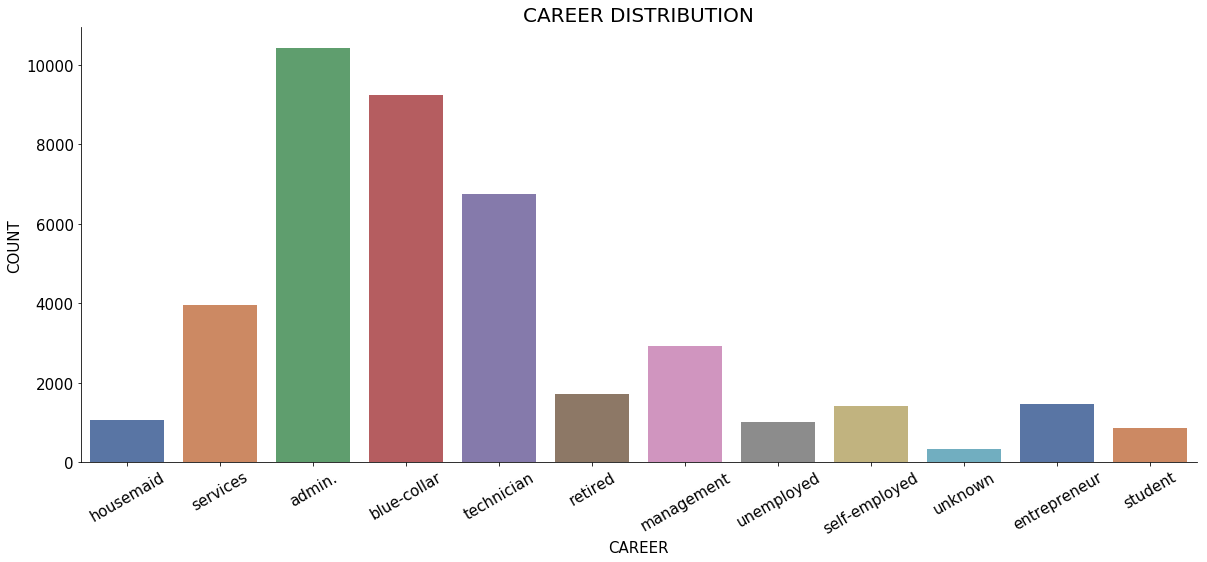

In [422]:
# OUT COME COUNT BASED ON JOB
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = client_info, palette='deep')
ax.set_xticklabels(client_info['job'].unique(), rotation=30)
ax.set_xlabel('CAREER', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
ax.set_title('CAREER DISTRIBUTION', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

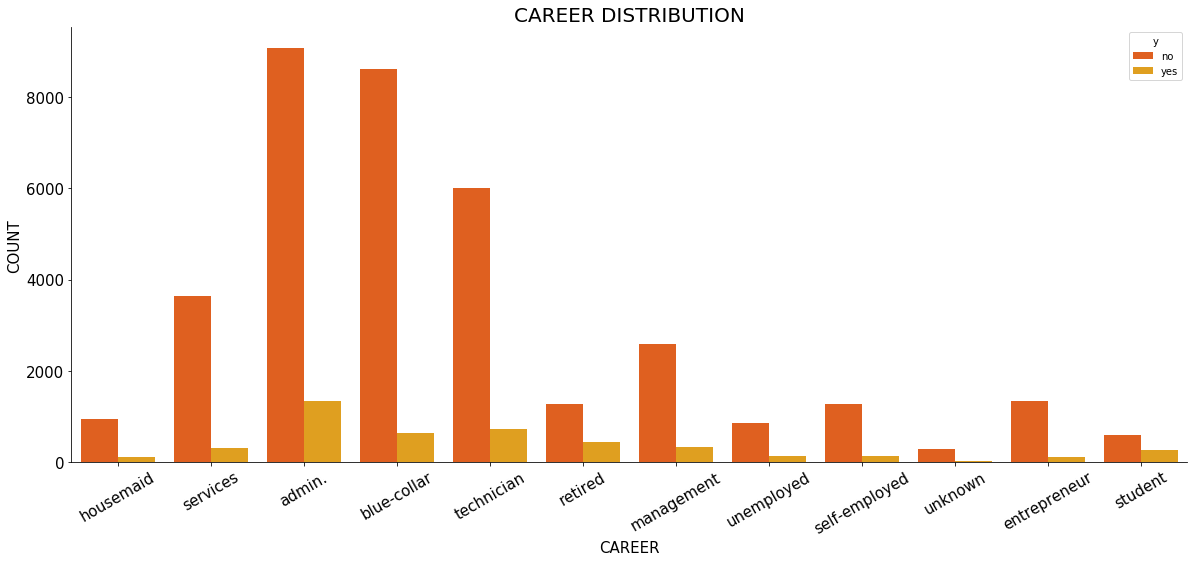

In [423]:
# OUT COME COUNT BASED ON JOB
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', hue='y', data = client_info, palette='autumn')
ax.set_xticklabels(client_info['job'].unique(), rotation=30)
ax.set_xlabel('CAREER', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
ax.set_title('CAREER DISTRIBUTION', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

In [424]:
client_education = client_info.groupby(['education', 'y']).count().iloc[:, 0:1]
client_education.columns = ['count']
client_education.T

education basic.4y      basic.6y      basic.9y      high.school        \
y               no  yes       no  yes       no  yes          no   yes   
count         3748  428     2104  188     5572  473        8484  1031   

education illiterate     professional.course      university.degree        \
y                 no yes                  no  yes                no   yes   
count             14   4                4648  595             10498  1670   

education unknown       
y              no  yes  
count        1480  251

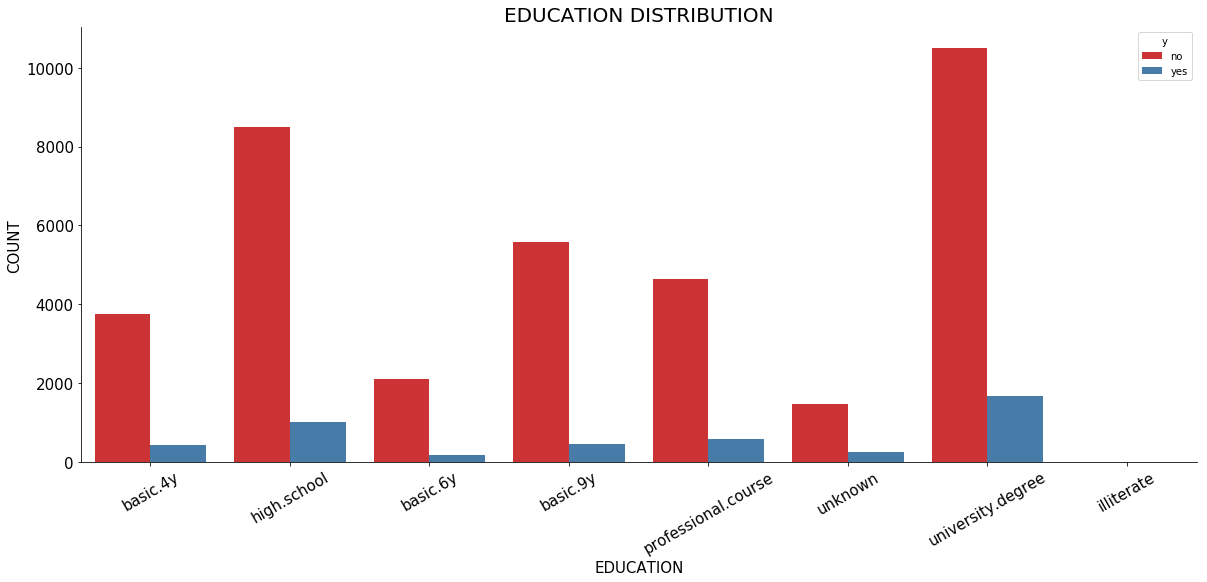

In [425]:
# OUT COME COUNT BASED ON EDUCATION
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', hue='y', data = client_info, palette='Set1')
ax.set_xticklabels(client_info['education'].unique(), rotation=30)
ax.set_xlabel('EDUCATION', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
ax.set_title('EDUCATION DISTRIBUTION', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

In [426]:
client_marital = client_info.groupby(['marital', 'y']).count().iloc[:, 0:1]
client_marital.columns = ['count']
client_marital.T

marital divorced      married       single       unknown    
y             no  yes      no   yes     no   yes      no yes
count       4136  476   22396  2532   9948  1620      68  12

In [427]:
client_poutcome = client_info.groupby(['poutcome', 'y']).count().iloc[:, 0:1]
client_poutcome.columns = ['count']
#poutcome = client_info.groupby(['poutcome', 'y']).count()
client_poutcome.T

poutcome failure      nonexistent       success     
y             no  yes          no   yes      no  yes
count       3647  605       32422  3141     479  894

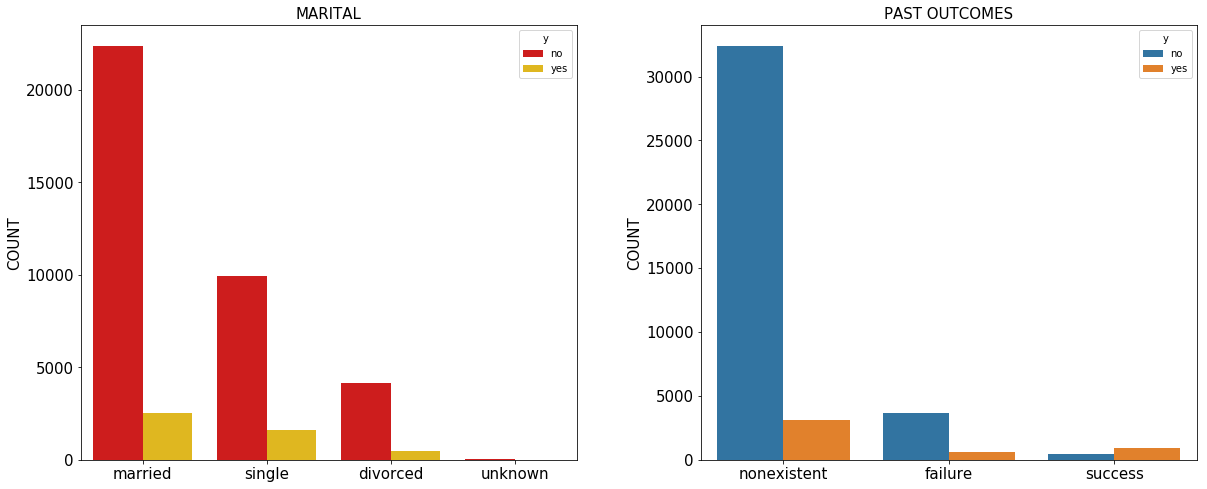

In [428]:
# MARITAL
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
sns.countplot(x = 'marital', hue='y', data = client_info, ax = ax1, palette='hot')
ax1.set_title('MARITAL', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('COUNT', fontsize=15)
ax1.tick_params(labelsize=15)

# PAST OUTCOMES
sns.countplot(x = 'poutcome', hue='y', data = client_info, ax = ax2)
ax2.set_title('PAST OUTCOMES', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('COUNT', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [429]:
client_default = client_info.groupby(['default', 'y']).count().iloc[:, 0:1]
client_default.columns = ['count']
client_default.T

default     no       unknown      yes
y           no   yes      no  yes  no
count    28391  4197    8154  443   3

In [430]:
client_housing = client_info.groupby(['housing', 'y']).count().iloc[:, 0:1]
client_housing.columns = ['count']
client_housing.T

housing     no       unknown         yes      
y           no   yes      no  yes     no   yes
count    16596  2026     883  107  19069  2507

In [431]:
client_loan = client_info.groupby(['loan', 'y']).count().iloc[:, 0:1]
client_loan.columns = ['count']
client_loan.T

loan      no       unknown        yes     
y         no   yes      no  yes    no  yes
count  30100  3850     883  107  5565  683

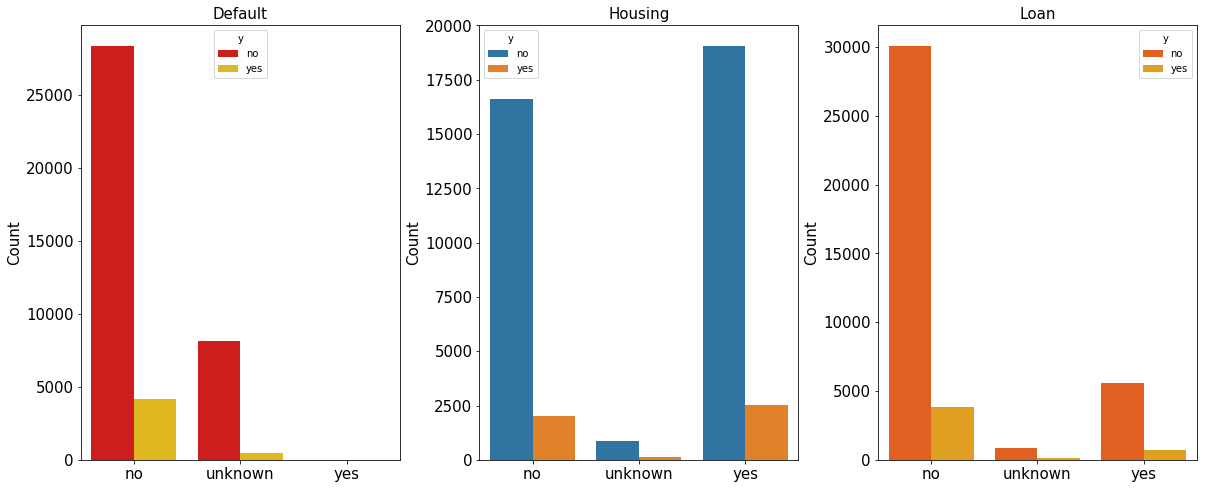

In [432]:
#DEFAULT
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', hue='y', data = client_info, ax = ax1, order = ['no', 'unknown', 'yes'], palette='hot')
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

#HOUSING
sns.countplot(x = 'housing', hue='y', data = client_info, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

#LOAN
sns.countplot(x = 'loan', hue='y', data = client_info, ax = ax3, order = ['no', 'unknown', 'yes'], palette='autumn')
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

 #### We will focus to analysis on Housing & Loan

In [433]:
# Ho: There is no difference between the subcription outcomes of the Housing's types
# Ha: There is difference between the subcription outcomes of the Housing's types
alpha = 0.5
#Yes total Proportion :
total_YN = client_info.count().iloc[0]
total_Y = client_info.loc[client_info['y']=='yes'].count().iloc[0]
prop_total_Y = round(total_Y/total_YN, 4)

#proprotion_Y of each type in Housing(Yes, Unknown, No)
housing_type = list(client_info['housing'].unique())
prop_housing_types = []
for t in housing_type:
    housing_YN = client_info.loc[client_info['housing']==t].count().iloc[0]
    housing_Y = client_info.loc[(client_info['housing']==t) & (client_info['y']=='yes')].count().iloc[0]
    prop_housing_Y = round(housing_Y/housing_YN, 4)
    prop_housing_types.append(prop_housing_Y)
    
# P-value:
from scipy.stats import ttest_1samp
data = prop_housing_types
s, p = ttest_1samp(data,prop_total_Y)
p

0.5859985142287997

In [434]:
client_Yhousing = client_info.loc[client_info['housing']   == 'yes']
client_Nhousing = client_info.loc[client_info['housing']   ==  'no']
Yhousing_Y      = client_Yhousing.loc[client_Yhousing['y'] == 'yes']
Nhousing_Y      = client_Nhousing.loc[client_Nhousing['y'] == 'yes']

count = np.array([len(Yhousing_Y), len(Nhousing_Y)])
nobs  = np.array([len(client_Yhousing), len(client_Nhousing)])
stat, pval   = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = nan 
 p-value = 0.5859985142287997


In [435]:
# PROPORTION OF SAYING YES OVER EACH GROUP OF HOUSING
p1 = len(Yhousing_Y)/len(client_Yhousing)
p2 = len(Nhousing_Y)/len(client_Nhousing)
theta1 = 2 * (np.arcsin(np.sqrt(p1)))
theta2 = 2 * (np.arcsin(np.sqrt(p2)))
cohensh_H = theta1 - theta2
cohensh_H

0.023415826653056193

In [436]:

statsmodels.stats.power.zt_ind_solve_power(effect_size = cohensh, nobs1 = len(Yhousing_Y), alpha = .05, power = None, ratio = len(Nhousing_Y)/len(Yhousing_Y))







NameError: name 'cohensh' is not defined

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                  nobs=np.arange(2, 10000),
                                  effect_size=np.array([0.2, 0.5, 0.8, .023]),
                                  alpha=0.01,
                                  ax=ax, title='Power of T-Proportion Test' + '\n' + r'$\alpha = 0.01$')
plt.subplots_adjust(bottom=0.2, right=0.8, top=2.0)
ax.get_legend().remove()
ax = fig.add_subplot(2, 1, 2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs=np.arange(2, 10000),
                                 effect_size=np.array([0.2, 0.5, 0.8, .023]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$')

### LOAN


In [ ]:
from statsmodels.stats.proportion import proportions_ztest
client_Yloan = client_info.loc[client_info['loan']   == 'yes']
client_Nloan = client_info.loc[client_info['loan']   ==  'no']
Yloan_Y      = client_Yloan.loc[client_Yloan['y'] == 'yes']
Nloan_Y      = client_Nloan.loc[client_Nloan['y'] == 'yes']

count = np.array([len(Yloan_Y), len(Nloan_Y)])
nobs  = np.array([len(client_Yloan), len(client_Nloan)])
z,p   = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

In [ ]:
# PROPORTION OF SAYING YES OVER EACH GROUP OF LOAN
p1 = len(Yloan_Y)/len(client_Yloan)
p2 = len(Nloan_Y)/len(client_Nloan)
theta1 = 2 * (np.arcsin(np.sqrt(p1)))
theta2 = 2 * (np.arcsin(np.sqrt(p2)))
cohensh_L = theta1 - theta2
cohensh_L

In [ ]:

statsmodels.stats.power.zt_ind_solve_power(effect_size = cohensh, nobs1 = len(Yloan_Y), alpha = .05, power = None, ratio = len(Nloan_Y)/len(Yloan_Y))







In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                  nobs=np.arange(2, 10000),
                                  effect_size=np.array([0.2, 0.5, 0.8, -0.013]),
                                  alpha=0.01,
                                  ax=ax, title='Power of T-Proportion Test' + '\n' + r'$\alpha = 0.01$')
plt.subplots_adjust(bottom=0.2, right=0.8, top=2.0)
ax.get_legend().remove()
ax = fig.add_subplot(2, 1, 2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs=np.arange(2, 10000),
                                 effect_size=np.array([0.2, 0.5, 0.8, -.013]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$')

In [ ]:
client_day = client_info.groupby(['day_of_week', 'y']).count().iloc[:, 0:1]
client_day.columns = ['count']
#poutcome = client_info.groupby(['poutcome', 'y']).count()
client_day.T

In [ ]:
client_month = client_info.groupby(['month', 'y']).count().iloc[:, 0:1]
client_day.columns = ['count']
#poutcome = client_info.groupby(['poutcome', 'y']).count()
client_month.T

In [ ]:
# OUT COME COUNT BASED ON DAY_OF_WEEK
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.countplot(x = 'day_of_week', hue='y', data = client_info, palette='husl')
#ax.set_xticklabels(client_info['poutcome'].unique(), rotation=30)
ax.set_xlabel('DAY OF WEEK', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
ax.set_title('DAY OF WEEK - OUTCOMES DISTRIBUTION', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

# OUT COME COUNT BASED ON MONTH
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.countplot(x = 'month', hue='y', data = client_info, palette='summer')
#ax.set_xticklabels(client_info['poutcome'].unique(), rotation=30)
ax.set_xlabel('MONTH', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
ax.set_title('MONTH - OUTCOMES DISTRIBUTION', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

##### By observation, obviously we can see the day of week does not significantly affect to the subcription outcomes.
##### By observation, obviously we can see the month of May significantly affect to the subcription outcomes.

HYPOTHESIS TEST:
Ho: There is no difference between the subcription outcomes of the months
Ha: There is difference between the subcription outcomes of the months
alpha = 0.5

In [ ]:
# Ho: There is no difference between the subcription outcomes of the months
# Ha: There is difference between the subcription outcomes of the months
alpha = 0.5
#Yes total Proportion :
total_YN = client_info.count().iloc[0]
total_Y = client_info.loc[client_info['y']=='yes'].count().iloc[0]
prop_total_Y = round(total_Y/total_YN, 4)

#proprotion_Y of each month
months = list(client_info['month'].unique())
prop_months = []
for m in months:
    month_YN = client_info.loc[client_info['month']==m].count().iloc[0]
    month_Y = client_info.loc[(client_info['month']==m) & (client_info['y']=='yes')].count().iloc[0]
    prop_month_Y = round(month_Y/month_YN, 4)
    prop_months.append(prop_month_Y)
    
# P-value:
from scipy.stats import ttest_1samp
data = prop_months
s, p = ttest_1samp(data,prop_total_Y)
p
print("Reject the Null Hypothesis p < alpha" ,  p < alpha)
print("Data lent a support to the Alternativ Hypothesis: There is difference between the subcription outcomes of the months ")

In [ ]:
# Write a function to calculate p-value for any categorical columns, e.g. education, month, loan, etc
from scipy.stats import ttest_1samp

def p_value_of_column(column_name): 
    # population proportion 
    total_YN = client_info.count().iloc[0]
    total_Y = client_info.loc[client_info['y']=='yes'].count().iloc[0]
    prop_total_Y = round(total_Y/total_YN, 4)

    # proportion of all unique values in the provided column
    categorical_values = list(client_info[column_name].unique())
    categorical_props = []
    for category in categorical_values:
        count_YN = client_info.loc[client_info[column_name] == category].count().iloc[0]
        count_Y = client_info.loc[(client_info[column_name] == category) & (client_info['y']=='yes')].count().iloc[0]
        prop_Y = round(count_Y/count_YN, 4)
        categorical_props.append(prop_Y)

    # P-value:
    s, p = ttest_1samp(categorical_props, prop_total_Y)
    return p

In [ ]:
test_columns = ['month', 'day_of_week', 'education', 'housing', 'loan', 'job', 'marital', 'default', 'poutcome']
for column in test_columns:
    p = p_value_of_column(column)
    print(f'P-Value of column {column}: {p}')

In [ ]:
client_duration = client_info.groupby(['duration', 'y']).count().iloc[:, 0:1]
client_duration.columns = ['count']
#poutcome = client_info.groupby(['poutcome', 'y']).count()
client_duration.T

In [ ]:
#duration_yes = client_info.loc[client_info['y']=='yes'].count()['age']
duration_yes = client_info.loc[client_info['y']=='yes'].count().iloc[0]
duration_no = client_info.loc[client_info['y']=='no'].count().iloc[0]
prop_Y = round(((duration_yes/(duration_yes + duration_no)) * 100), 2)
prop_N = round(((duration_no/(duration_yes + duration_no)) * 100), 2)
print(f"Calls With Duration: {duration_yes} Yes ({prop_Y} %) vs {duration_no} No ({prop_N} %)")

In [ ]:
print("Max duration  call in minutes:   ", round((client_info['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((client_info['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((client_info['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((client_info['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.distplot(client_info['duration'], color='Green')
sns.despine
ax.set_xlabel('DURATION', fontsize=15)
ax.set_ylabel('OCCURENCE', fontsize=15)
ax.set_title('OCCURENCE with DURATION DISTRIBUTION', fontsize=20)
ax.tick_params(labelsize=10)

#### There is no thing we can do with call duration, the only thing we can do that improve agents' sale skill.

In [ ]:
x = df.poutcome.value_counts()
j = df.groupby(['poutcome', 'y']).size()
print(x)
print(j)

In [ ]:
prev_outcome = ['failure', 'success', 'nonexistent']
yes = [605/4252, 894/1373, 3141/35563]
no = [3647/4252, 479/1373, 32422/35563]

plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Percentage of Current Campaign Outcome')
plt.bar(prev_outcome, yes, alpha = .75, label ='Yes')
plt.bar(prev_outcome, no, alpha = .2, label = 'No')
plt.legend()

In [ ]:
success_total = df.loc[df['poutcome']=='success'] #total number of customers with successful outcomes from the previous campaign
failure_total = df.loc[df['poutcome']=='failure'] #total number of customers with failed outcomes in the previous campaign
non_total = df.loc[df['poutcome']=='nonexistent'] # total number of customers with non existen outcomes in the previous campaign
success_y = success_total.loc[success_total['y']=='yes']# number of sign ups in this campaign from people that had a successful outcome in the last campaign
failure_y = failure_total.loc[failure_total['y'] == 'yes'] #number of sign ups in this campaign from people that had a failed outcome in the last campaign
nonex_y = non_total.loc[non_total['y'] == 'yes'] #number of sign ups in this campaign from people that had a non existen outcome in the last campaign
non_success = len(failure_y) + len(nonex_y)
non_success_total = len(failure_total) + len(non_total)

# count = np.array([len(success_y), (len(failure_y) + len(non_y))])
count = np.array([len(success_y), non_success])
nobs = np.array([len(success_total), non_success_total])
z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

In [ ]:
non_success_total/len(df)

In [ ]:
#let's see how much of the data is categorized as non existent, failure and success.
print('Poutcome Non Existent Percentage of Data: {}'.format(len(non_total)/len(df))) 
print('Poutcome Failure Percentage of Data: {}'.format(len(failure_total)/len(df)))
print('Poutcome Success Percentage of Data: {}'.format(len(success_total)/len(df)))

In [ ]:
count = np.array([len(success_y), len(failure_y)])
nobs = np.array([len(success_total), len(failure_total)])
z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

In [ ]:
p2

In [ ]:
p1 = len(success_y)/len(success_total)# proportion of successes from previous campaign that signed up
p2 = len(failure_y)/len(failure_total)# proportion of failures from previous campaign that signed up
theta1 = 2 * (np.arcsin(np.sqrt(p1)))
theta2 = 2 * (np.arcsin(np.sqrt(p2)))
cohensh = theta1 - theta2
cohensh

In [ ]:

statsmodels.stats.power.zt_ind_solve_power(effect_size = cohensh, nobs1 = len(success_y), alpha = .05, power = None, ratio = len(failure_y)/len(success_y))





In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs=np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8, 1.1]),
                                 alpha=0.01,
                                 ax=ax, title='Power of T-Proportion Test' + '\n' + r'$\alpha = 0.01$')
plt.subplots_adjust(bottom=0.2, right=0.8, top=2.0)
ax.get_legend().remove()
ax = fig.add_subplot(2, 1, 2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs=np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8, 1.1]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$')

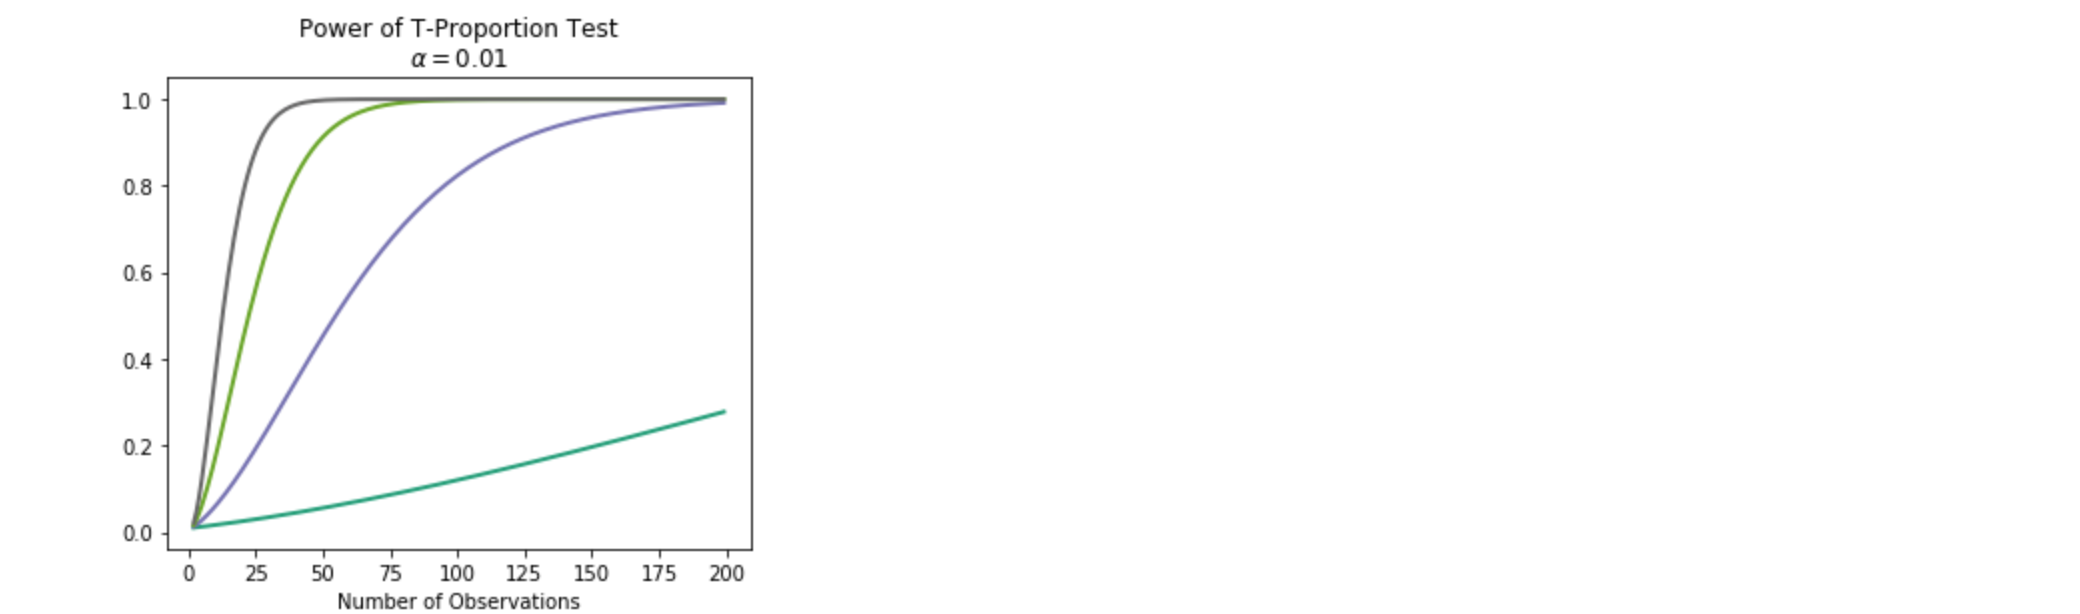

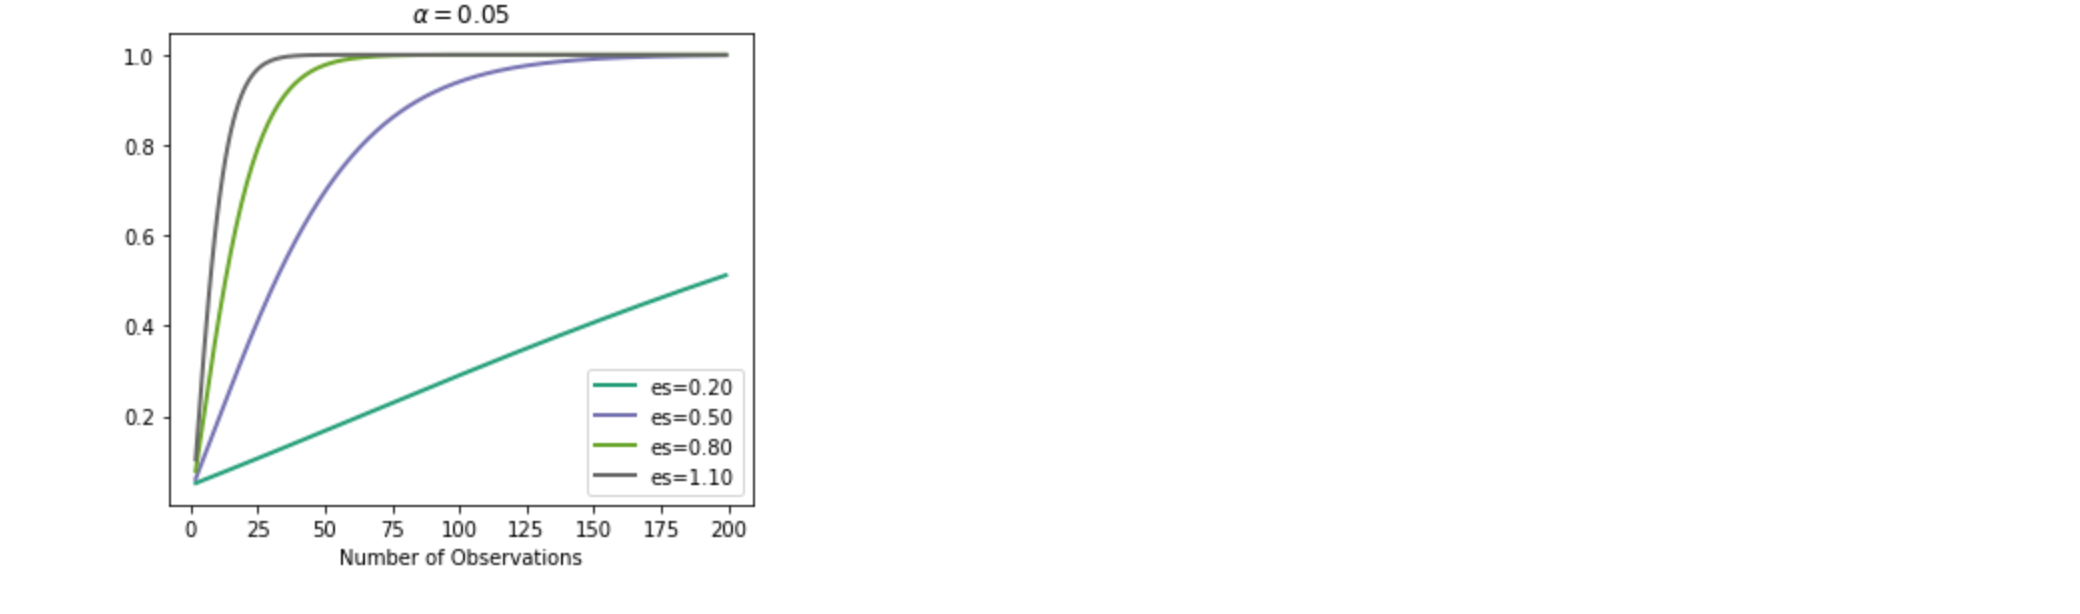

In [ ]:
#From Gary
high_school_total = df.loc[df['education']=='high_school'] #total number of customers with highschool education
college_total = df.loc[df['education']=='university.degree'] #total number of customers with college level education
high_school_y = high_school_total.loc[high_school_total['y']=='yes']# number of sign ups for people with highschool education
college_y = college_total.loc[college_total['y'] == 'yes'] #number of sign ups for people with college education

from statsmodels.stats.proportion import proportions_ztest
count = np.array([len(college_y), len(high_school_y)])
nobs = np.array([len(college_total), len(high_school_total)])
z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
#print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

In [ ]:
#From Gary
p1 = len(high_school_y)/len(high_school_total)
p2 = len(college_y)/len(college_total)
theta1 = np.arcsin(np.sqrt(p1))
theta2 = np.arcsin(np.sqrt(p2))
cohensh = theta1 - theta2
cohensh

In [ ]:
# # Add a new feature
# df['group_in_week'] = df['day_of_week']
# df['group_in_week'].replace(to_replace = 'mon', value = 'mon_fri', inplace = True)
# df['group_in_week'].replace(to_replace = 'fri', value = 'mon_fri', inplace = True)
# df['group_in_week'].replace(to_replace = 'tue', value = 'tue_wed_thu', inplace = True)
# df['group_in_week'].replace(to_replace = 'wed', value = 'tue_wed_thu', inplace = True)
# df['group_in_week'].replace(to_replace = 'thu', value = 'tue_wed_thu', inplace = True)
# df1 = df.groupby(['day_of_week', 'y']).count()['age']
# df1


In [ ]:
# from Gary
# # using statsmodels
# count{int, array_like}
# the number of successes in nobs trials. If this is array_like, 
# then the assumption is that this represents the number of successes for 
# each independent sample
# nobs{int, array_like}
# the number of trials or observations, with the same length as count.

high_school_total = df.loc[df['education']=='high_school'] #total number of customers with highschool education
college_total = df.loc[df['education']=='university.degree'] #total number of customers with college level education
high_school_y = high_school_total.loc[high_school_total['y']=='yes']# number of sign ups for people with highschool education
college_y = college_total.loc[college_total['y'] == 'yes'] #number of sign ups for people with college education

from statsmodels.stats.proportion 
import proportions_ztest
count = np.array([len(college_y), len(high_school_y)])
nobs = np.array([len(college_total), len(high_school_total)])
z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

In [ ]:
df['cons.conf.idx'].unique()

In [ ]:
df['cons.price.idx'].unique()

In [ ]:
discount = OrderDetail_df[OrderDetail_df['Discount']!=0].groupby('ProductId')['Quantity'].mean()
no_discount = OrderDetail_df[OrderDetail_df['Discount']==0].groupby('ProductId')['Quantity'].mean()
plt.figure(figsize=(16,5))
plt.bar(discount.index, discount.values, alpha=1, label='Discount', color='#a0b0f0')
plt.bar(no_discount.index, no_discount.values, alpha=0.8, label='No Discount', color='#c9f9a0')
plt.legend()
plt.title('Order quantities with/without discount')
plt.xlabel('Product ID')
plt.ylabel('Average quantities')
plt.show()

### sampling

In [ ]:
# scikit-learn bootstrap
from sklearn.utils import resample
# data sample
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,10,10]
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=20, random_state=10)
print('Bootstrap Sample: %s' % boot)
# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

In [ ]:
# examine the bool & object with describe
df.describe(include=['object', 'bool'])

### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Input variables:

### Bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')